# ‘Portugal Bank Marketing’ dataset

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

#pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns', None)

pd.set_option('display.max_columns', None)  
pd.set_option("display.max_colwidth", -1)

In [4]:
#file reading 
bank = pd.read_csv(r'D:\Imarticus_new\Dataset\Exam\ML1 exam\bank.csv',delimiter=';')

In [5]:
a=bank.shape
print('There are Total',a[0],'number of records and', a[1] ,'attributes in the dataset')
print('-'*80)
b = bank.ndim
print('The dimension of the dataset is   :', b)
print('-'*80)
c = bank.index
print('Index of the dataset is           :', c)
print('-'*80)
d = bank.size
print('The size of the dataset is        :' , d)

There are Total 41188 number of records and 21 attributes in the dataset
--------------------------------------------------------------------------------
The dimension of the dataset is   : 2
--------------------------------------------------------------------------------
Index of the dataset is           : RangeIndex(start=0, stop=41188, step=1)
--------------------------------------------------------------------------------
The size of the dataset is        : 864948


In [6]:
bank.shape

(41188, 21)

In [7]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
bank.rename(columns = {'emp.var.rate':'emp_var_rate','cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed',
                          'cons.price.idx':'cons_price_idx'}, inplace=True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [10]:
bank.nunique()

age               78  
job               12  
marital           4   
education         8   
default           3   
housing           3   
loan              3   
contact           2   
month             10  
day_of_week       5   
duration          1544
campaign          42  
pdays             27  
previous          8   
poutcome          3   
emp_var_rate      10  
cons_price_idx    26  
cons_conf_idx     26  
euribor3m         316 
nr_employed       11  
y                 2   
dtype: int64

In [11]:
bank.describe(include= 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [12]:
bank = bank.drop ( ['duration']  , axis = 1)
#drop the column as it is not needed or important

In [13]:
 bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
bank.y.value_counts()

no     36548
yes    4640 
Name: y, dtype: int64

# There are 36548 clients who has not Subscribed to Term Deposit and there are 4640 clients who has Subscribed for Term Deposit

In [15]:
# list of Categorical columns------
Categorcal_col =[]
Cat_col = bank.select_dtypes(exclude =[np.number])

for i in Cat_col:
    Categorcal_col.append(i)
print('Categorical Columns:',Categorcal_col)
print('-'*123)



#List of Numeriacl Columns-------
Numerical_Col =[]
Num_col = bank.select_dtypes(include =[np.number])

for i in Num_col:
    Numerical_Col.append(i)
print('Numerical Columns:',Numerical_Col)
    


Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
---------------------------------------------------------------------------------------------------------------------------
Numerical Columns: ['age', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


In [16]:
# Data Reading for Categorical Columns ---------
bank.select_dtypes('object').head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [17]:
# Data Reading for Numerical Columns -----------
bank.select_dtypes(include=[np.number]).head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


# Data Cleaning

# Missing Value Analysis

In [18]:
#bank.replace('?',np.nan,inplace=True)
bank.replace('unknown',np.nan,inplace=True)

In [19]:
bank.isnull().sum()

age               0   
job               330 
marital           80  
education         1731
default           8597
housing           990 
loan              990 
contact           0   
month             0   
day_of_week       0   
campaign          0   
pdays             0   
previous          0   
poutcome          0   
emp_var_rate      0   
cons_price_idx    0   
cons_conf_idx     0   
euribor3m         0   
nr_employed       0   
y                 0   
dtype: int64

<AxesSubplot:>

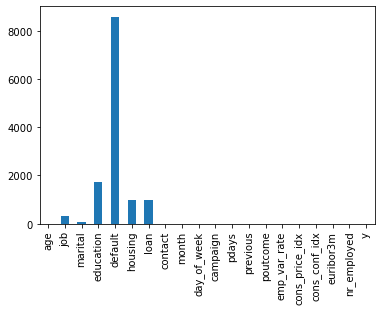

In [20]:
bank.isnull().sum().plot(kind='bar')

In [21]:
# We will replace the null values of 'Unknown' column with 'others' 
bank.job.fillna('others',inplace = True)
# We will replace the null values of 'Unknown' column with 'married' 
bank.marital.fillna('married',inplace = True)
# We will replace the null values of 'Unknown' column with 'illiterate' 
bank.education.fillna('illiterate',inplace = True)
# We will replace the null values of 'Unknown' column with 'no' 
bank.default.fillna('no',inplace = True)
# We will replace the null values of 'Unknown' column with 'yes' 
bank.housing.fillna('yes',inplace = True)
# We will replace the null values of 'Unknown' column with 'no' 
bank.loan.fillna('no',inplace = True)


In [22]:
# checking for Nulls after imputing the null values

bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

# Exploratory Data Analysis 

In [21]:
# list of Categorical columns------
Categorcal_col =[]
Cat_col = bank.select_dtypes(exclude =[np.number])

for i in Cat_col:
    Categorcal_col.append(i)
print('Categorical Columns:',Categorcal_col)

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [22]:
f=['job', 'marital', 'education', 'default', 'housing', 'loan',  'contact', 'month',
   'day_of_week', 'poutcome', 'y']

list(enumerate(f))



[(0, 'job'),
 (1, 'marital'),
 (2, 'education'),
 (3, 'default'),
 (4, 'housing'),
 (5, 'loan'),
 (6, 'contact'),
 (7, 'month'),
 (8, 'day_of_week'),
 (9, 'poutcome'),
 (10, 'y')]

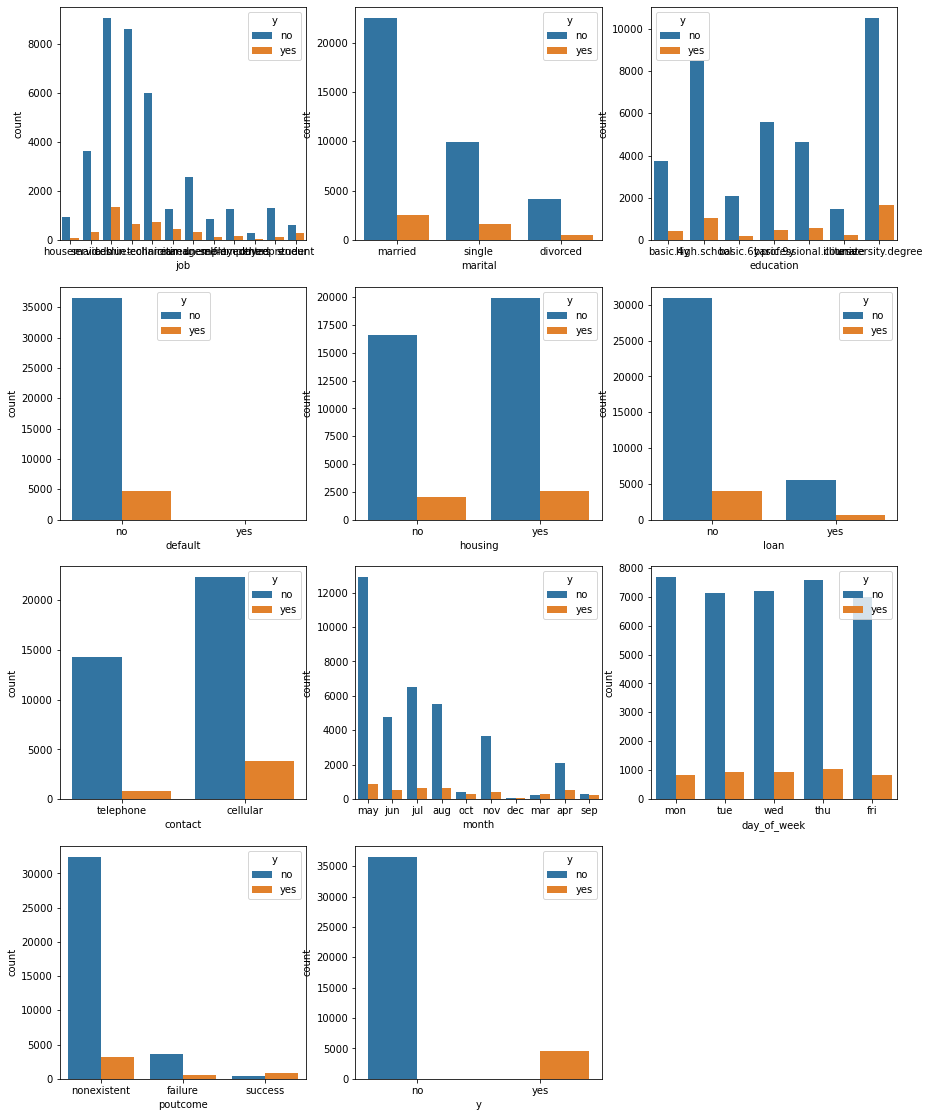

In [23]:
plt.figure(figsize=(15,30))
for i in enumerate(f):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(i[1],hue='y', data = bank)

Text(0.5, 1.0, "Client's who  have subscribed to a Term Deposit")

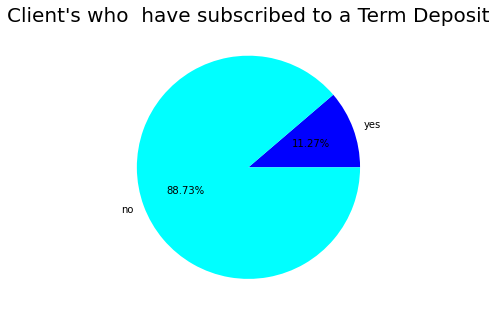

In [24]:
y = ('yes', 'no') ## USD trillion dollar
values = (4640,36548)

plt.figure(figsize = (5,7))
plt.pie(values , labels = y , autopct= '%1.2f%%' , radius = 1 ,colors = ['b','aqua'] ) ;   
plt.title("Client's who  have subscribed to a Term Deposit"  , size =20 )
## 1.2 means it will show show you 2 no. after  decimal

There are 11.27% People who have Subscribed to a Term Deposit out of 41188 People .

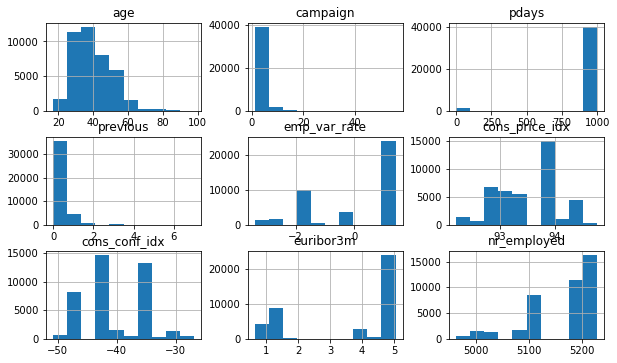

In [187]:
bank.hist(figsize =(10,10),layout=(5,3),sharex = False);

# showing the outliers in the dataset

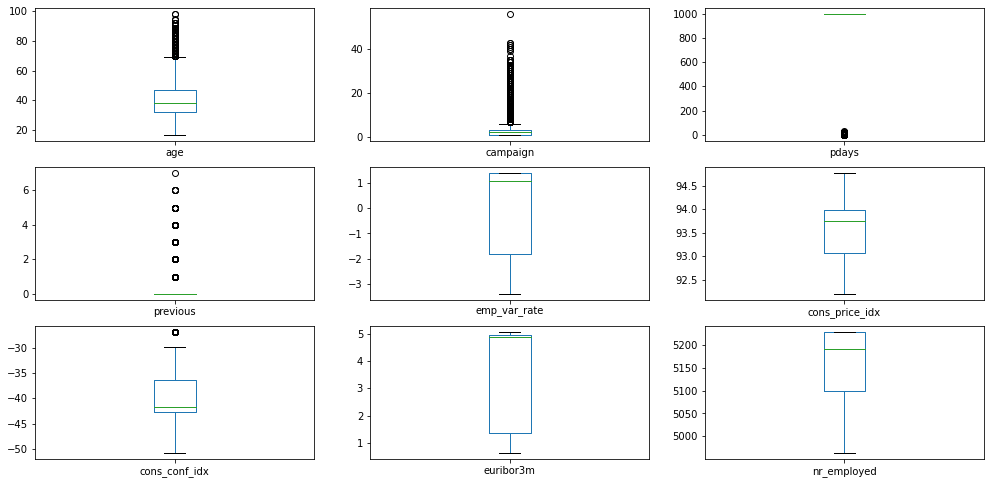

In [27]:
bank.plot(kind='box',figsize =(17,20),layout=(7,3),sharex=False,subplots=True);

# Correlogram to check the randomness in the data with and without regression

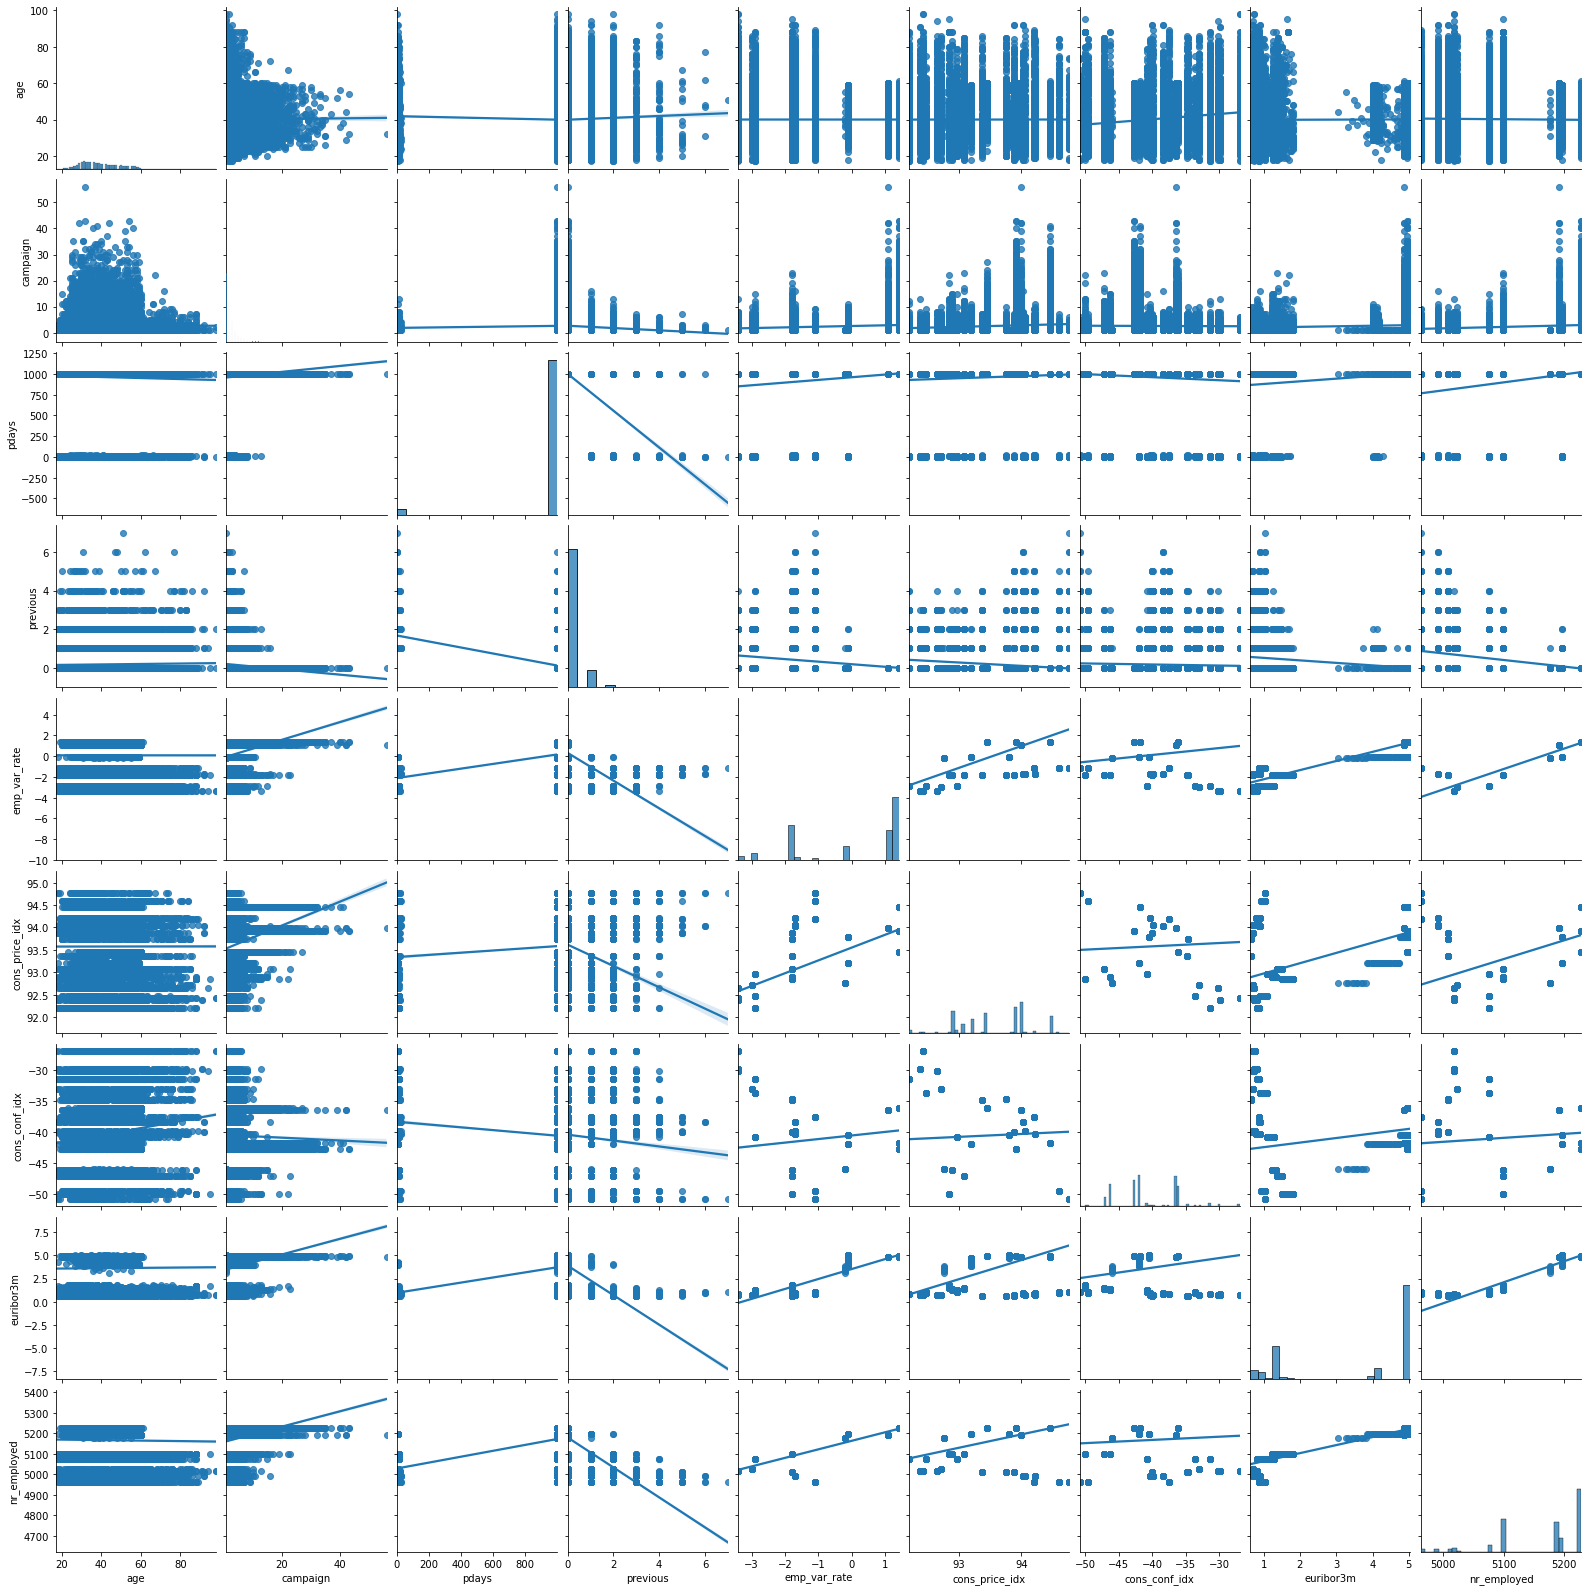

In [28]:
# with regression
sns.pairplot(bank, kind="reg")
plt.show()
 

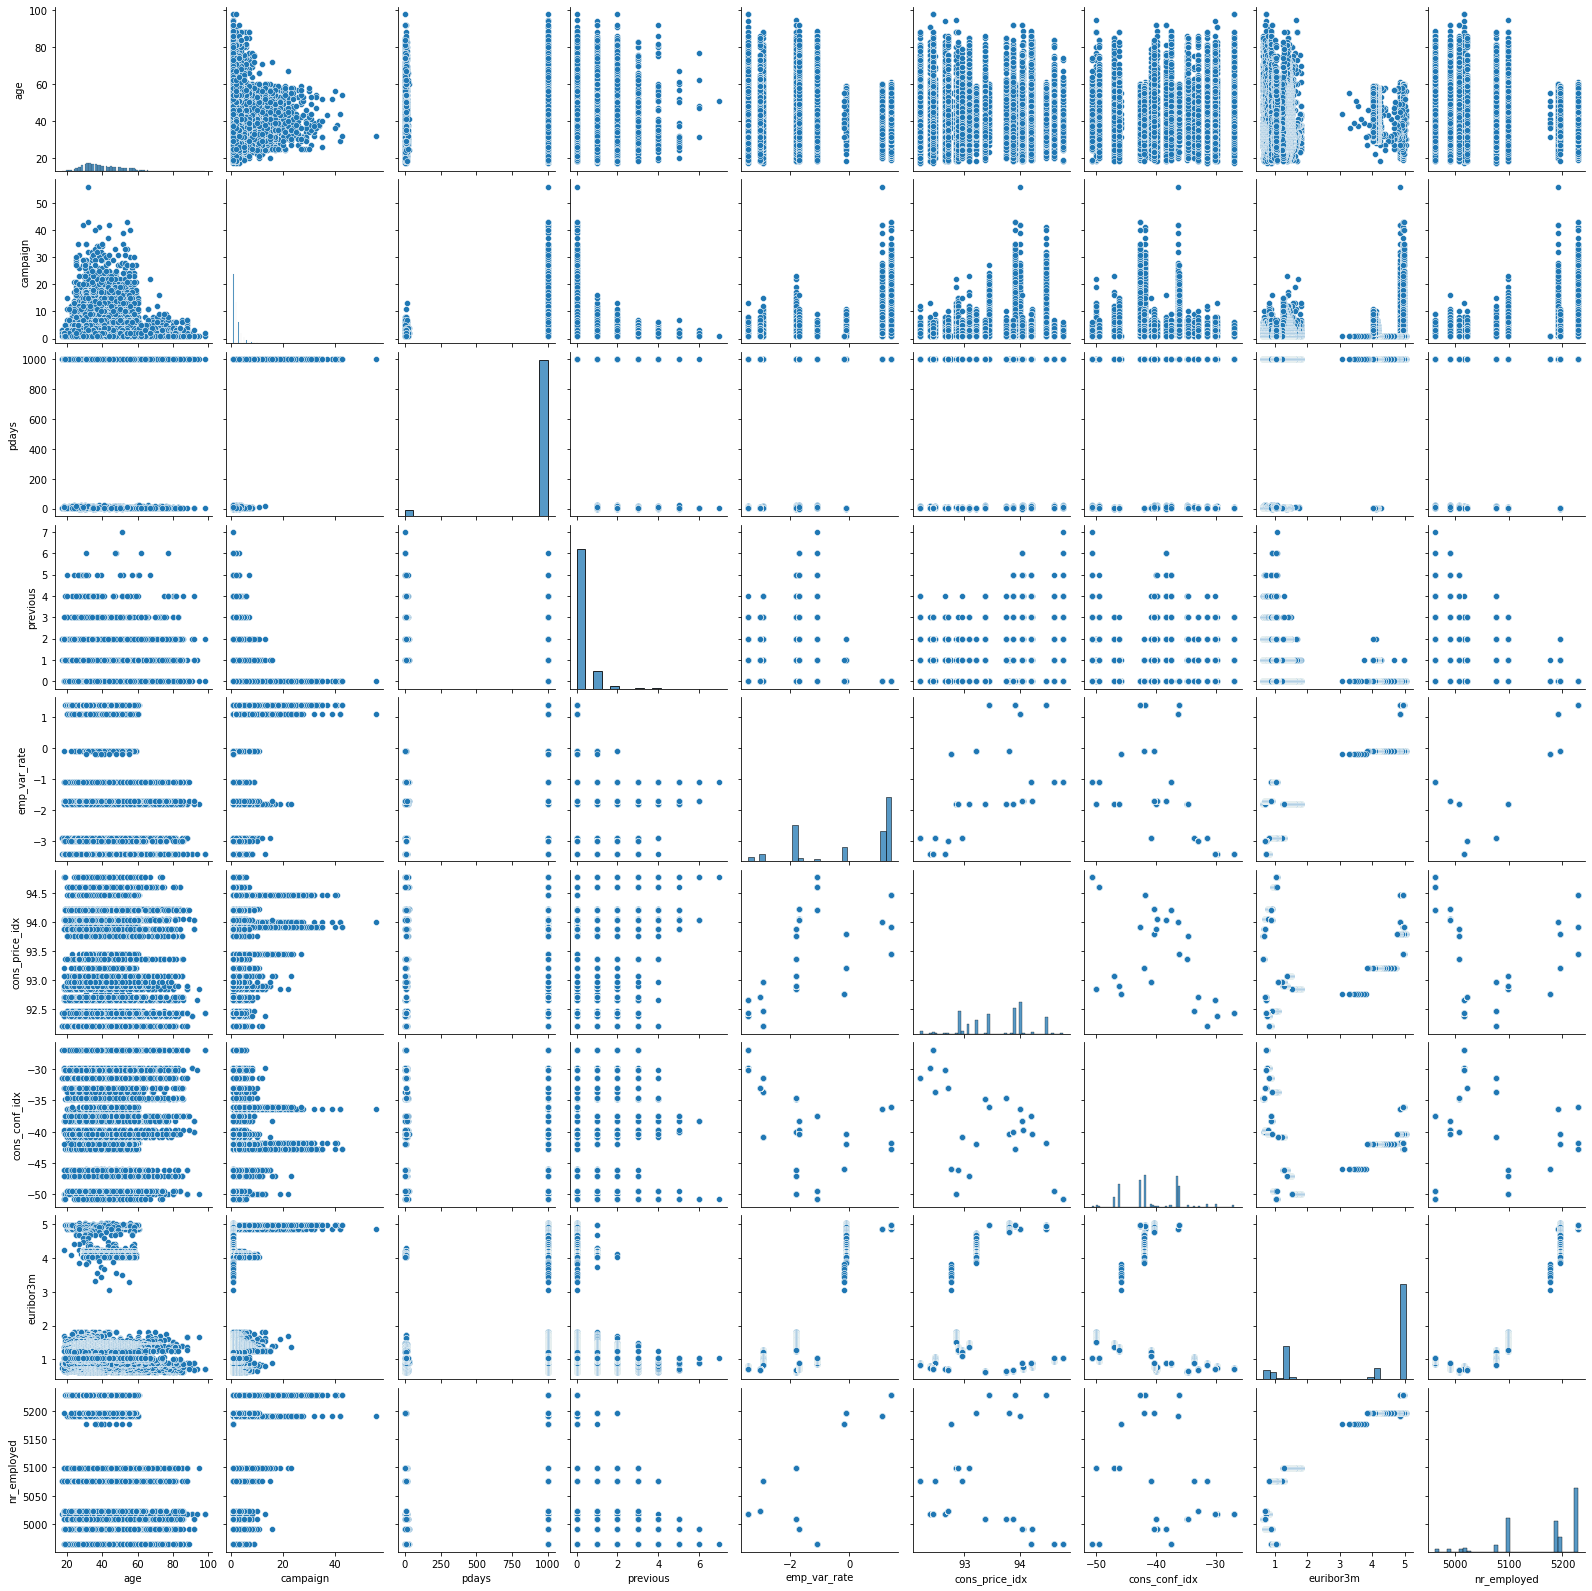

In [115]:
# without regression
sns.pairplot(bank, kind="scatter")
plt.show()
 

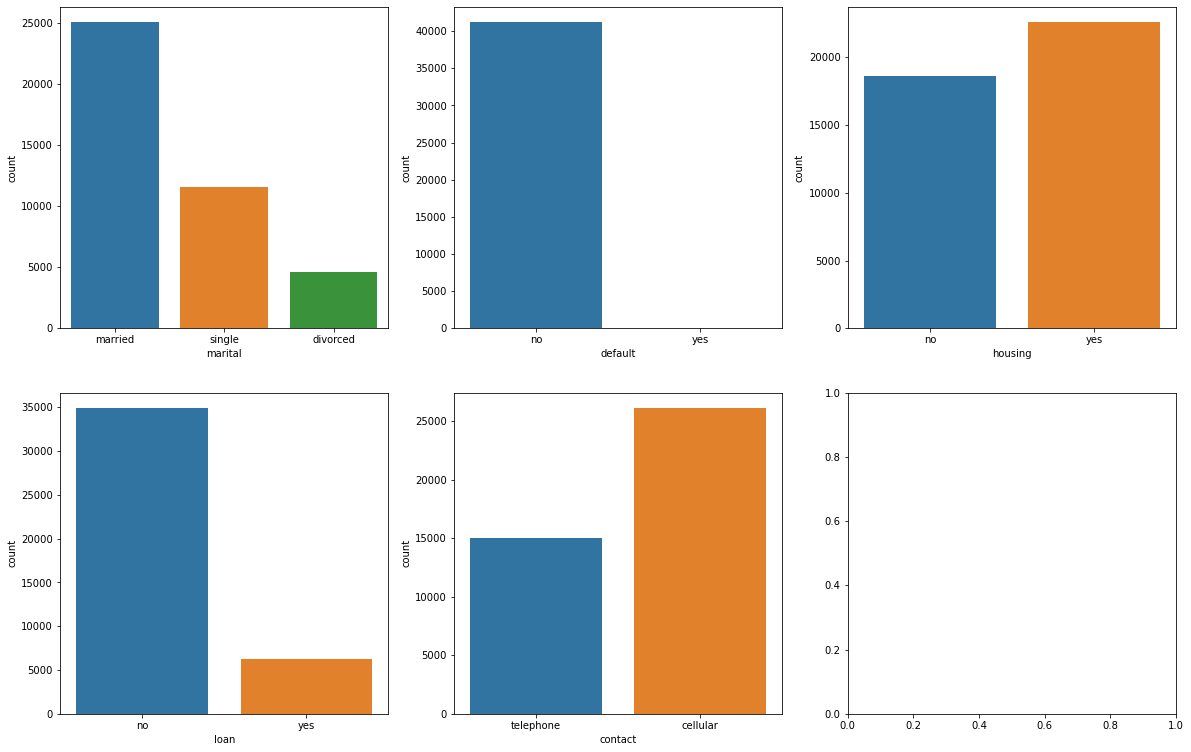

In [116]:
#subplots making
fig, ax = plt.subplots(2,3 , figsize = (20,13))

sns.countplot(data = bank, x="marital", ax=ax[0,0]);
sns.countplot(data = bank, x ="default", ax=ax[0,1]);
sns.countplot(data = bank, x ="housing", ax=ax[0,2]);
sns.countplot(data = bank, x ="loan", ax=ax[1,0]);
sns.countplot(data = bank, x ="contact" , ax=ax[1,1]);

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

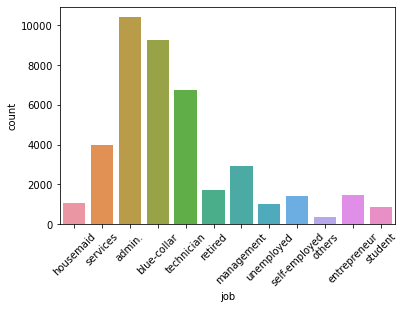

In [117]:

chart=sns.countplot(x = 'job' , data = bank);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xticks

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

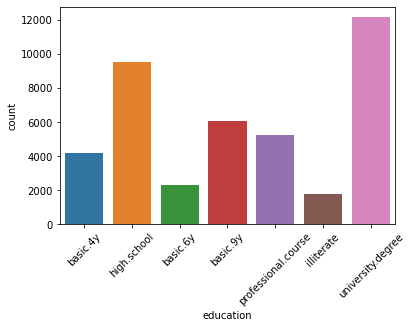

In [118]:
chart=sns.countplot(x = 'education' , data = bank);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xticks

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

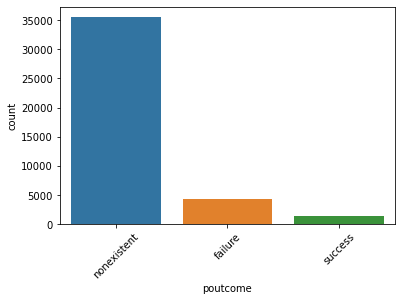

In [119]:
chart=sns.countplot(x = 'poutcome' , data = bank);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xticks

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

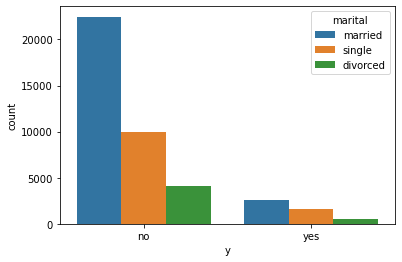

In [120]:
sns.countplot(x = 'y' , data = bank , hue = 'marital')
plt.xticks

# b. Label Encoding wherever required

In [23]:
bank.select_dtypes(  include = ['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [24]:
bank.marital.replace({'divorced': 0, 'single': 1, 'married':2}, inplace = True)
bank.education.replace({'illiterate':0,'basic.4y':1,'basic.6y':2,'basic.9y':3,'high.school':4 ,'professional.course':5,
                     'university.degree':6}, inplace = True)
bank.default.replace({'no':0,'yes':1}, inplace = True)
bank.housing.replace({'no':0,'yes':1}, inplace = True)
bank.loan.replace({'no':0,'yes':1}, inplace = True)
bank.contact.replace({'cellular':0,'telephone':1}, inplace = True)
bank.month.replace({'mar':0,'apr':1,'may':2,'jun':3,'jul':4 ,'aug':5,'sep':6,
                   'oct':7,'nov':8,'dec':9}, inplace = True)
bank.day_of_week.replace({'mon':0,'tue':1,'wed':2,'thu':3,'fri':4}, inplace = True)
bank.poutcome.replace({'nonexistent':0,'failure':1,'success':2}, inplace = True)
bank.y.replace({'no':0,'yes':1}, inplace = True)

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
bank[bank.select_dtypes(include=['object']).columns]=bank[bank.select_dtypes(include=['object']).columns].apply(le.fit_transform)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,3,2,1,0,0,0,1,2,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,8,2,4,0,0,0,1,2,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,8,2,4,0,1,0,1,2,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,2,2,0,0,0,1,2,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,8,2,4,0,0,1,1,2,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [27]:
bank.select_dtypes(  include = ['object']).columns

Index([], dtype='object')

In [28]:
#correlation between the variables

corr=bank.corr()
corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.001466,0.116581,-0.184377,0.001891,-0.001755,-0.007198,0.007021,0.077265,-0.018486,0.004594,-0.034369,0.024365,0.026371,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,-0.001466,1.000000,-0.042139,0.097865,0.013433,0.007479,-0.011168,-0.030497,0.046198,-0.002259,-0.007226,-0.028793,0.023748,0.023347,-0.014051,-0.021200,0.049537,-0.014273,-0.025092,0.028096
marital,0.116581,-0.042139,1.000000,-0.109347,0.006258,-0.008469,0.001577,0.043604,0.002495,0.004309,-0.000403,0.016699,-0.028844,-0.028815,0.047892,0.023771,0.051051,0.053781,0.049536,-0.025622
education,-0.184377,0.097865,-0.109347,1.000000,0.003212,0.019706,0.012915,-0.112437,0.120843,-0.003108,-0.001586,-0.025457,0.020924,0.026058,-0.041505,-0.098614,0.043502,-0.032516,-0.024261,0.035953
default,0.001891,0.013433,0.006258,0.003212,1.000000,-0.003679,-0.003609,-0.006474,0.010003,-0.005923,-0.003803,0.001668,0.002766,0.003061,0.004445,-0.003141,0.004492,0.005274,0.005941,-0.003041
housing,-0.001755,0.007479,-0.008469,0.019706,-0.003679,1.000000,0.036425,-0.077937,0.029715,-0.008510,-0.010959,-0.010131,0.021677,0.023436,-0.059100,-0.077170,-0.032388,-0.058233,-0.045590,0.011085
loan,-0.007198,-0.011168,0.001577,0.012915,-0.003609,0.036425,1.000000,-0.013367,-0.001696,0.001850,0.005294,-0.000086,-0.002143,-0.000380,0.001193,-0.005944,-0.013673,-0.000487,0.004205,-0.004466
contact,0.007021,-0.030497,0.043604,-0.112437,-0.006474,-0.077937,-0.013367,1.000000,-0.324315,0.019583,0.077368,0.117970,-0.212848,-0.226813,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,0.077265,0.046198,0.002495,0.120843,0.010003,0.029715,-0.001696,-0.324315,1.000000,-0.006959,-0.030635,-0.079556,0.063754,0.060841,0.058874,-0.150350,0.264227,0.163411,0.132697,0.037187
day_of_week,-0.018486,-0.002259,0.004309,-0.003108,-0.005923,-0.008510,0.001850,0.019583,-0.006959,1.000000,0.015098,0.006765,0.004013,0.003279,-0.004401,-0.004586,-0.000099,-0.005552,-0.000734,0.010051


In [29]:
corr.y

age               0.030399
job               0.028096
marital          -0.025622
education         0.035953
default          -0.003041
housing           0.011085
loan             -0.004466
contact          -0.144773
month             0.037187
day_of_week       0.010051
campaign         -0.066357
pdays            -0.324914
previous          0.230181
poutcome          0.270373
emp_var_rate     -0.298334
cons_price_idx   -0.136211
cons_conf_idx     0.054878
euribor3m        -0.307771
nr_employed      -0.354678
y                 1.000000
Name: y, dtype: float64

<AxesSubplot:>

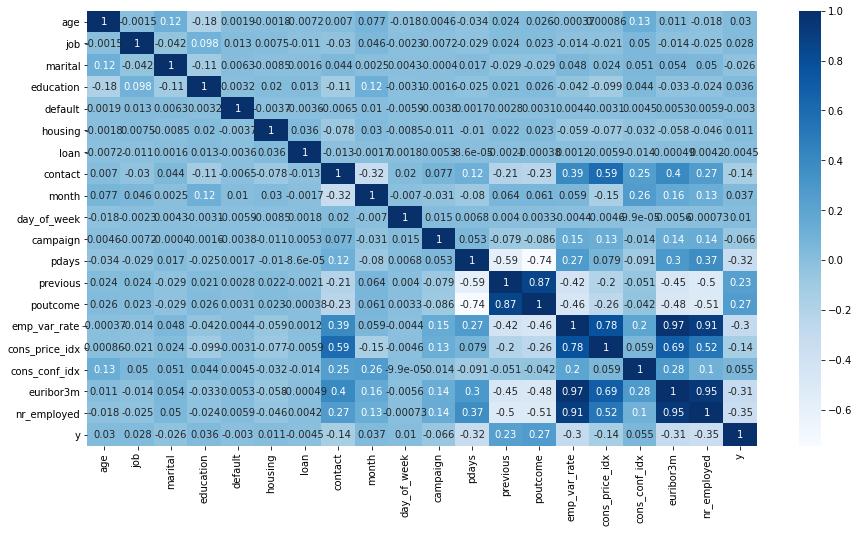

In [30]:
#heatmap uses color code to show you the result  
plt.figure(figsize = (15,8))
sns.heatmap(bank.corr() , annot = True , cmap ="Blues")

# Random Sampling

In [31]:
y = bank["y"]
x =bank.drop("y", axis=1)

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy="minority")

#df_train_x_under ,df_train_y_under = undersample.fit_resample(df_train_x,df_train_y)
x_over , y_over = oversample.fit_resample(x, y)
y_over
from sklearn.model_selection import train_test_split
bank_train_x, bank_test_x, bank_train_y, bank_test_y = train_test_split(x_over, y_over, test_size=0.2, random_state=2022)

print('Dimensions of x_train',bank_train_x.shape)
print('Dimensions of y_train',bank_train_y.shape)
print('-'*80)
print('Dimensions of x_test',bank_test_x.shape)
print('Dimensions of y_test',bank_test_y.shape)


Dimensions of x_train (58476, 19)
Dimensions of y_train (58476,)
--------------------------------------------------------------------------------
Dimensions of x_test (14620, 19)
Dimensions of y_test (14620,)


In [32]:
bank_train_x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
6560,31,1,2,2,0,0,0,1,2,2,2,999,0,0,1.1,93.994,-36.4,4.857,5191.0
47835,38,4,2,3,0,0,0,1,2,4,1,999,0,0,1.1,93.994,-36.4,4.855,5191.0
48034,38,7,2,3,0,0,0,0,5,4,1,999,0,0,1.4,93.444,-36.1,4.964,5228.1
71355,35,0,2,4,0,1,0,0,2,0,1,999,0,0,-1.8,92.893,-46.2,1.264,5099.1
53184,51,10,2,5,0,0,1,0,9,0,2,999,0,0,-3.0,92.713,-33.0,0.709,5023.5


# Decison Tree

In [89]:
#importing decision tree and creating its object
from sklearn.tree import DecisionTreeClassifier

#Creating an object for Decision Tree
dc = DecisionTreeClassifier()

In [90]:
# Decision Tree model Building
dc.fit(bank_train_x, bank_train_y)

DecisionTreeClassifier()

In [91]:
from sklearn.metrics import confusion_matrix
prediction_dc = dc.predict(bank_test_x)
tab_dc = confusion_matrix(prediction_dc , bank_test_y)

# we have given the predicted and actual values to built the confusion matrix
tab_dc

array([[7203, 6197],
       [ 173, 1047]], dtype=int64)

In [92]:

from sklearn.metrics import confusion_matrix

confusion_matrix(prediction_dc , bank_test_y)
result=pd.crosstab(prediction_dc, bank_test_y, rownames = ['Predicted'], colnames =['Actual'], margins = True)
result
# Predicted and actual values are given

Actual,0,1,All
Predicted,,,
0,7203,6197,13400
1,173,1047,1220
All,7376,7244,14620


In [93]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score


print("Accuracy = ",round(accuracy_score(prediction_dc, bank_test_y) * 100, 4),"%")
print('-'*80)
print('Precision by using Decision Tree:', round(metrics.precision_score(bank_test_y,prediction_dc)  *100))
print('-'*80)
print('Recall by using Decision Tree:',  round(metrics.recall_score   (bank_test_y, prediction_dc) *100))
print('-'*80)
print('F1 Score by using Decision Tree:', round(f1_score(prediction_dc , bank_test_y)*100))

Accuracy =  56.4295 %
--------------------------------------------------------------------------------
Precision by using Decision Tree: 86
--------------------------------------------------------------------------------
Recall by using Decision Tree: 14
--------------------------------------------------------------------------------
F1 Score by using Decision Tree: 25


In [94]:
print('feature importances:' ,dc.feature_importances_ )
print('-'*80)
print('len of feature importances:',len(dc.feature_importances_))
print('-'*80)
print('sum of feature importances:',dc.feature_importances_.sum())
print('-'*80)

feature importances: [0.1884533  0.0784196  0.03881388 0.07979444 0.         0.03972401
 0.02531228 0.00859973 0.04515035 0.05859253 0.07858732 0.01312404
 0.01334414 0.00422481 0.00357898 0.01635071 0.00923518 0.0943476
 0.20434708]
--------------------------------------------------------------------------------
len of feature importances: 19
--------------------------------------------------------------------------------
sum of feature importances: 1.0000000000000002
--------------------------------------------------------------------------------


In [96]:
feat_imp_df = pd.DataFrame({'Features':bank_train_x.columns , 'Importance': dc.feature_importances_})
feat_imp_df.sort_values('Importance', ascending= False)

,Features,Importance
18,nr_employed,0.204347
0,age,0.188453
17,euribor3m,0.094348
3,education,0.079794
10,campaign,0.078587
1,job,0.078420
9,day_of_week,0.058593
8,month,0.045150
5,housing,0.039724
2,marital,0.038814


In [97]:
bank_train_x_names= bank_train_x.columns

The Area under the Curve is: 56.05
--------------------------------------------------------------------------------


Text(0.5, 0.5, '0.5605')

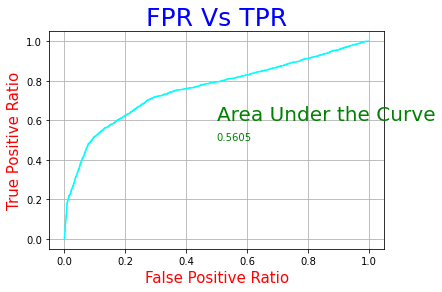

In [99]:
from sklearn.metrics import roc_auc_score   #to check area under the curve
from sklearn.metrics import roc_curve  # to plot the curve

dc_roc_auc = roc_auc_score(bank_test_y , prediction_dc)
dc_roc_auc = np.round(dc_roc_auc, 4)
print('The Area under the Curve is:',(dc_roc_auc)*100) # area under the curve
print('-'*80)

pred_value_prob1 = dc.predict_proba(bank_test_x)   #the code is used to plot ROC
#pred_value_prob

df1= pd.DataFrame(pred_value_prob1)

fpr, tpr , threshold = roc_curve(bank_test_y , df.iloc[:,-1])

plt.plot(fpr, tpr ,color='aqua' )
plt.xlabel("False Positive Ratio"  , size= 15 , color= 'r')       
plt.ylabel("True Positive Ratio"  , size = 15, color='r')        
plt.title("FPR Vs TPR"  , size = 25 , color = "b")
plt.grid()
plt.text(x = .5 , y= .6 , s= "Area Under the Curve" , size = 20 , color= "g")
plt.text(x = .5 , y= .5 , s= dc_roc_auc, size = 10 , color= "g")

In [100]:
from sklearn.metrics import classification_report
print(classification_report(bank_test_y, prediction_dc))

              precision    recall  f1-score   support

           0       0.54      0.98      0.69      7376
           1       0.86      0.14      0.25      7244

    accuracy                           0.56     14620
   macro avg       0.70      0.56      0.47     14620
weighted avg       0.70      0.56      0.47     14620



# Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 135 , criterion= 'gini' )
rfc.fit(bank_train_x, bank_train_y)

RandomForestClassifier(n_estimators=135)

In [34]:
pred_rfc = rfc.predict(bank_test_x)
pred_rfc

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [35]:
# Confusion  matrix on Test Data--------------

from sklearn.metrics import confusion_matrix

confusion_matrix(pred_rfc ,bank_test_y)
result=pd.crosstab(pred_rfc, bank_test_y, rownames = ['Predicted'], colnames =['Actual'], margins = True)
result
# Predicted and actual values are given

Actual,0,1,All
Predicted,,,
0,6878,20,6898
1,498,7224,7722
All,7376,7244,14620


In [36]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score



print("Accuracy = ",round(accuracy_score(pred_rfc , bank_test_y) * 100, 4),"%")
print('-'*80)
print('Precision by using RF:', round(metrics.precision_score(bank_test_y,pred_rfc)  *100))
print('-'*80)
print('Recall by using RF:',  round(metrics.recall_score   (bank_test_y, pred_rfc) *100))
print('-'*80)
print('F1 Score by using RF:', round(f1_score(pred_rfc , bank_test_y)*100))

Accuracy =  96.4569 %
--------------------------------------------------------------------------------
Precision by using RF: 94
--------------------------------------------------------------------------------
Recall by using RF: 100
--------------------------------------------------------------------------------
F1 Score by using RF: 97


In [37]:
print('feature importances:' ,rfc.feature_importances_ )
print('-'*80)
print('len of feature importances:',len(rfc.feature_importances_))
print('-'*80)
print('sum of feature importances:',rfc.feature_importances_.sum())
print('-'*80)


feature importances: [1.85829357e-01 8.53358001e-02 3.87577339e-02 7.84758160e-02
 3.14309321e-06 3.12970084e-02 2.19203129e-02 1.56445603e-02
 1.94276427e-02 5.61286021e-02 9.02462230e-02 2.13102512e-02
 1.26141341e-02 1.96219267e-02 5.26542347e-02 1.87853676e-02
 2.89509484e-02 1.47950332e-01 7.50466060e-02]
--------------------------------------------------------------------------------
len of feature importances: 19
--------------------------------------------------------------------------------
sum of feature importances: 1.0
--------------------------------------------------------------------------------


In [38]:
feat_imp_df = pd.DataFrame({'Features':bank_train_x.columns , 'Importance': rfc.feature_importances_})
feat_imp_df.sort_values('Importance', ascending= False)

,Features,Importance
0,age,0.185829
17,euribor3m,0.147950
10,campaign,0.090246
1,job,0.085336
3,education,0.078476
18,nr_employed,0.075047
9,day_of_week,0.056129
14,emp_var_rate,0.052654
2,marital,0.038758
5,housing,0.031297


The Area under the Curve is: 96.49
--------------------------------------------------------------------------------


Text(0.5, 0.5, '0.9649')

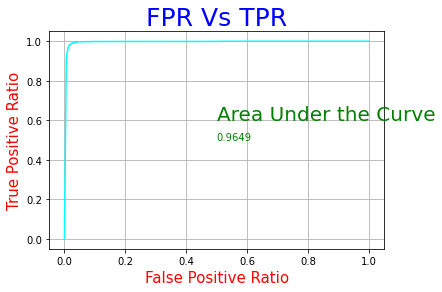

In [40]:
from sklearn.metrics import roc_auc_score   #to check area under the curve
from sklearn.metrics import roc_curve  # to plot the curve


rf_roc_auc = roc_auc_score(bank_test_y , pred_rfc)
rf_roc_auc = np.round(rf_roc_auc, 4)
print('The Area under the Curve is:',(rf_roc_auc)*100) # area under the curve
print('-'*80)


pred_value_prob2 = rfc.predict_proba(bank_test_x)   #the code is used to plot ROC
#pred_value_prob


df2= pd.DataFrame(pred_value_prob2)


fpr, tpr , threshold = roc_curve(bank_test_y , df2.iloc[:,-1])


plt.plot(fpr, tpr ,color='aqua' )
plt.xlabel("False Positive Ratio"  , size= 15 , color= 'r')       
plt.ylabel("True Positive Ratio"  , size = 15, color='r')        
plt.title("FPR Vs TPR"  , size = 25 , color = "b")
plt.grid()
plt.text(x = .5 , y= .6 , s= "Area Under the Curve" , size = 20 , color= "g")
plt.text(x = .5 , y= .5 , s= rf_roc_auc, size = 10 , color= "g")


In [41]:
from sklearn.metrics import classification_report
print(classification_report(bank_test_y, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      7376
           1       0.94      1.00      0.97      7244

    accuracy                           0.96     14620
   macro avg       0.97      0.96      0.96     14620
weighted avg       0.97      0.96      0.96     14620



# e. Standardize the data using the anyone of the scalers provided by sklearn


In [110]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
scaler= StandardScaler()   
StandardScaler()

StandardScaler()

In [111]:
bank_scale = bank.copy()
bank_scale = bank_scale.drop(['pdays', 'default'], axis=1)

In [112]:
categorical_cols= ['job','marital', 'education',  'housing', 'loan', 'contact',
                   'month', 'day_of_week','poutcome','y']

In [113]:
feature_scale=[feature for feature in bank_scale.columns if feature not in
               categorical_cols]

In [114]:
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [115]:
scaled_bank = pd.concat([bank_scale[categorical_cols].reset_index(drop=True),
            pd.DataFrame(scaler.transform(bank_scale[feature_scale]),
                         columns=feature_scale)],axis=1)

In [116]:
scaled_bank.head()

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,y,age,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,3,2,1,0,0,1,2,0,0,0,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,8,2,4,0,0,1,2,0,0,0,1.628993,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,8,2,4,1,0,1,2,0,0,0,-0.290186,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,0,2,2,0,0,1,2,0,0,0,-0.002309,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,8,2,4,0,1,1,2,0,0,0,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


# a. Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [43]:
logreg.fit(bank_train_x,bank_train_y)

LogisticRegression()

In [44]:
pred_log = logreg.predict(bank_test_x)

In [45]:

from sklearn.metrics import confusion_matrix

confusion_matrix(pred_log , bank_test_y)
result=pd.crosstab(pred_log, bank_test_y, rownames = ['Predicted'], colnames =['Actual'], margins = True)
result
# Predicted and actual values are given

Actual,0,1,All
Predicted,,,
0,5384,2189,7573
1,1992,5055,7047
All,7376,7244,14620


In [46]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score


print("Accuracy = ",round(accuracy_score(pred_log , bank_test_y) * 100, 4),"%")
print('-'*80)
print('Precision by using Logistic:', round(metrics.precision_score(bank_test_y,pred_log)  *100))
print('-'*80)
print('Recall by using Logistic:',  round(metrics.recall_score   (bank_test_y, pred_log) *100))
print('-'*80)
print('F1 Score by using Logistic:', round(f1_score(pred_log , bank_test_y)*100))

Accuracy =  71.4022 %
--------------------------------------------------------------------------------
Precision by using Logistic: 72
--------------------------------------------------------------------------------
Recall by using Logistic: 70
--------------------------------------------------------------------------------
F1 Score by using Logistic: 71


The Area under the Curve is : 71.39


Text(0.5, 0.5, '0.7139')

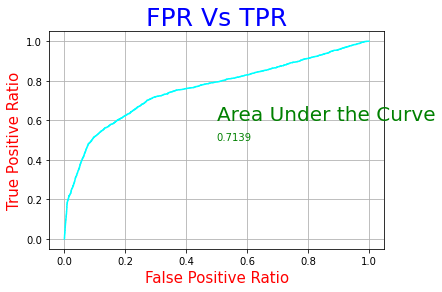

In [47]:
from sklearn.metrics import roc_auc_score   #to check area under the curve
from sklearn.metrics import roc_curve  # to plot the curve

log_roc_auc = roc_auc_score(bank_test_y , pred_log)
log_roc_auc = np.round(log_roc_auc, 4)
print('The Area under the Curve is :',(log_roc_auc)*100) # area under the curve

pred_value_prob = logreg.predict_proba(bank_test_x)   #the code is used to plot ROC
#pred_value_prob

df= pd.DataFrame(pred_value_prob)

fpr, tpr , threshold = roc_curve(bank_test_y , df.iloc[:,-1])

plt.plot(fpr, tpr ,color='aqua' )
plt.xlabel("False Positive Ratio"  , size= 15 , color= 'r')       
plt.ylabel("True Positive Ratio"  , size = 15, color='r')        
plt.title("FPR Vs TPR"  , size = 25 , color = "b")
plt.grid()
plt.text(x = .5 , y= .6 , s= "Area Under the Curve" , size = 20 , color= "g")
plt.text(x = .5 , y= .5 , s= log_roc_auc, size = 10 , color= "g")

In [48]:
from sklearn.metrics import classification_report
print(classification_report(bank_test_y, pred_log))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      7376
           1       0.72      0.70      0.71      7244

    accuracy                           0.71     14620
   macro avg       0.71      0.71      0.71     14620
weighted avg       0.71      0.71      0.71     14620



# b. AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier (n_estimators = 100, random_state=0)
ab.fit(bank_train_x , bank_train_y)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [50]:
pred_ab =ab.predict(bank_test_x)

from sklearn.metrics import confusion_matrix

confusion_matrix(pred_ab , bank_test_y)
result=pd.crosstab(pred_ab, bank_test_y, rownames = ['Predicted'], colnames =['Actual'], margins = True)
result
# Predicted and actual values are given

Actual,0,1,All
Predicted,,,
0,6341,2767,9108
1,1035,4477,5512
All,7376,7244,14620


In [51]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score



print("Accuracy = ",round(accuracy_score(pred_ab , bank_test_y) * 100, 4),"%")
print('-'*80)
print('Precision by using AdaBoost:', round(metrics.precision_score(bank_test_y,pred_ab)  *100))
print('-'*80)
print('Recall by using AdaBoost:',  round(metrics.recall_score   (bank_test_y, pred_ab) *100))
print('-'*80)
print('F1 Score by using AdaBoost:', round(f1_score(pred_ab , bank_test_y)*100))

Accuracy =  73.9945 %
--------------------------------------------------------------------------------
Precision by using AdaBoost: 81
--------------------------------------------------------------------------------
Recall by using AdaBoost: 62
--------------------------------------------------------------------------------
F1 Score by using AdaBoost: 70


In [52]:
print('feature importances:' ,ab.feature_importances_ )
print('-'*80)
print('len of feature importances:',len(ab.feature_importances_))
print('-'*80)
print('sum of feature importances:',ab.feature_importances_.sum())
print('-'*80)

feature importances: [0.06 0.01 0.   0.03 0.   0.   0.   0.02 0.04 0.04 0.07 0.01 0.01 0.01
 0.09 0.04 0.07 0.48 0.02]
--------------------------------------------------------------------------------
len of feature importances: 19
--------------------------------------------------------------------------------
sum of feature importances: 1.0
--------------------------------------------------------------------------------


In [60]:
feat_imp_df = pd.DataFrame({'Features':bank_train_x.columns , 'Importance': ab.feature_importances_})
feat_imp_df.sort_values('Importance', ascending= False)


,Features,Importance
17,euribor3m,0.48
14,emp_var_rate,0.09
16,cons_conf_idx,0.07
10,campaign,0.07
0,age,0.06
8,month,0.04
15,cons_price_idx,0.04
9,day_of_week,0.04
3,education,0.03
7,contact,0.02


The Area under the Curve is: 73.89
--------------------------------------------------------------------------------


Text(0.5, 0.5, '0.7389')

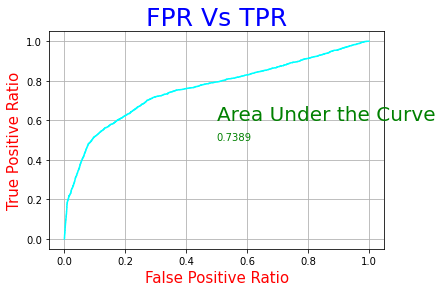

In [61]:
from sklearn.metrics import roc_auc_score   #to check area under the curve
from sklearn.metrics import roc_curve  # to plot the curve


ab_roc_auc = roc_auc_score(bank_test_y , pred_ab)
ab_roc_auc = np.round(ab_roc_auc, 4)
print('The Area under the Curve is:',(ab_roc_auc)*100) # area under the curve
print('-'*80)


pred_value_prob3 = ab.predict_proba(bank_train_x)   #the code is used to plot ROC
#pred_value_prob


df3= pd.DataFrame(pred_value_prob3)


fpr, tpr , threshold = roc_curve(bank_test_y , df.iloc[:,-1])


plt.plot(fpr, tpr ,color='aqua' )
plt.xlabel("False Positive Ratio"  , size= 15 , color= 'r')       
plt.ylabel("True Positive Ratio"  , size = 15, color='r')        
plt.title("FPR Vs TPR"  , size = 25 , color = "b")
plt.grid()
plt.text(x = .5 , y= .6 , s= "Area Under the Curve" , size = 20 , color= "g")
plt.text(x = .5 , y= .5 , s= ab_roc_auc, size = 10 , color= "g")


In [62]:
from sklearn.metrics import classification_report
print(classification_report(bank_test_y, pred_ab))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77      7376
           1       0.81      0.62      0.70      7244

    accuracy                           0.74     14620
   macro avg       0.75      0.74      0.74     14620
weighted avg       0.75      0.74      0.74     14620



# c. Naïve Bayes

In [63]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [64]:
numerical = bank_train_x.select_dtypes(exclude=['object']).columns
bank_train_x[numerical] = minmax.fit_transform(bank_train_x[numerical])

In [65]:
from sklearn.naive_bayes import MultinomialNB
naivebayes = MultinomialNB()

In [66]:
naivebayes.fit(bank_train_x, bank_train_y)

MultinomialNB()

In [67]:
pred_nb = naivebayes.predict(bank_test_x)

In [68]:
from sklearn.metrics import confusion_matrix

confusion_matrix(pred_nb , bank_test_y)
result=pd.crosstab(pred_nb, bank_test_y, rownames = ['Predicted'], colnames =['Actual'], margins = True)
result
# Predicted and actual values are given

Actual,0,1,All
Predicted,,,
0,7376,7244,14620
All,7376,7244,14620


In [69]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score


print("Accuracy = ",round(accuracy_score(pred_nb , bank_test_y) * 100, 4),"%")
print('-'*80)
print('Precision by using NB:', round(metrics.precision_score(bank_test_y,pred_nb)  *100))
print('-'*80)
print('Recall by using NB:',  round(metrics.recall_score   (bank_test_y, pred_nb) *100))
print('-'*80)
print('F1 Score by using NB:', round(f1_score(pred_nb , bank_test_y)*100))

Accuracy =  50.4514 %
--------------------------------------------------------------------------------
Precision by using NB: 0
--------------------------------------------------------------------------------
Recall by using NB: 0
--------------------------------------------------------------------------------
F1 Score by using NB: 0


The Area under the Curve is: 50.0
--------------------------------------------------------------------------------


Text(0.5, 0.5, '0.5')

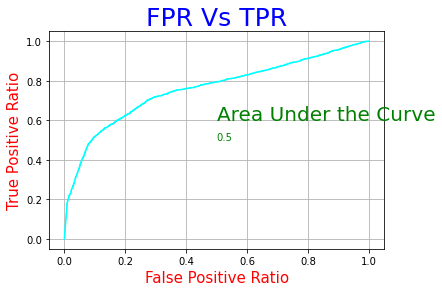

In [70]:
from sklearn.metrics import roc_auc_score   #to check area under the curve
from sklearn.metrics import roc_curve  # to plot the curve


nb_roc_auc = roc_auc_score(bank_test_y , pred_nb)
nb_roc_auc = np.round(nb_roc_auc, 4)
print('The Area under the Curve is:',(nb_roc_auc)*100) # area under the curve
print('-'*80)


pred_value_prob10 = naivebayes.predict_proba(bank_test_x)   #the code is used to plot ROC
#pred_value_prob

df10= pd.DataFrame(pred_nb)

fpr, tpr , threshold = roc_curve(bank_test_y , df.iloc[:,-1])

plt.plot(fpr, tpr ,color='aqua' )
plt.xlabel("False Positive Ratio"  , size= 15 , color= 'r')       
plt.ylabel("True Positive Ratio"  , size = 15, color='r')        
plt.title("FPR Vs TPR"  , size = 25 , color = "b")
plt.grid()
plt.text(x = .5 , y= .6 , s= "Area Under the Curve" , size = 20 , color= "g")
plt.text(x = .5 , y= .5 , s= nb_roc_auc, size = 10 , color= "g")

In [71]:
from sklearn.metrics import classification_report
print(classification_report(bank_test_y, pred_nb))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7376
           1       0.00      0.00      0.00      7244

    accuracy                           0.50     14620
   macro avg       0.25      0.50      0.34     14620
weighted avg       0.25      0.50      0.34     14620



# d. KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=69)

In [73]:
knn.fit(bank_train_x, bank_train_y)

KNeighborsClassifier(n_neighbors=69)

In [74]:
pred_knn= knn.predict(bank_test_x)

In [75]:
from sklearn.metrics import confusion_matrix

tab_knn =confusion_matrix(pred_knn , bank_test_y)
from sklearn.metrics import classification_report
tab_knn

array([[7375, 7244],
       [   1,    0]], dtype=int64)

In [76]:

from sklearn.metrics import confusion_matrix

confusion_matrix(pred_knn , bank_test_y)
result=pd.crosstab(pred_knn, bank_test_y, rownames = ['Predicted'], colnames =['Actual'], margins = True)
result
# Predicted and actual values are given

Actual,0,1,All
Predicted,,,
0,7375,7244,14619
1,1,0,1
All,7376,7244,14620


In [77]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score


print("Accuracy = ",round(accuracy_score(pred_knn , bank_test_y) * 100, 4),"%")
print('-'*80)
print('Precision by using KNN:', round(metrics.precision_score(bank_test_y,pred_knn)  *100))
print('-'*80)
print('Recall by using KNN:',  round(metrics.recall_score   (bank_test_y, pred_knn) *100))
print('-'*80)
print('F1 Score by using KNN:', round(f1_score(pred_knn , bank_test_y)*100))

Accuracy =  50.4446 %
--------------------------------------------------------------------------------
Precision by using KNN: 0
--------------------------------------------------------------------------------
Recall by using KNN: 0
--------------------------------------------------------------------------------
F1 Score by using KNN: 0


In [78]:
import matplotlib.pyplot as plt
plt.plot(acc_list, color = 'cyan')
plt.grid()

NameError: name 'acc_list' is not defined

In [79]:
from sklearn.metrics import classification_report
print(classification_report(bank_test_y, pred_knn))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7376
           1       0.00      0.00      0.00      7244

    accuracy                           0.50     14620
   macro avg       0.25      0.50      0.34     14620
weighted avg       0.25      0.50      0.34     14620



# e. SVM with Linear

In [80]:
from sklearn.svm import SVC
svc= SVC(kernel = 'linear')

In [81]:
svc.fit(bank_train_x, bank_train_y)

SVC(kernel='linear')

In [82]:
pred_svm = svc.predict(bank_test_x)

In [83]:
from sklearn.metrics import confusion_matrix

tab_svm =confusion_matrix(pred_svm , bank_test_y)
from sklearn.metrics import classification_report
tab_svm

array([[   0,    0],
       [7376, 7244]], dtype=int64)

In [84]:
from sklearn.metrics import confusion_matrix

confusion_matrix(pred_svm , bank_test_y)
result=pd.crosstab(pred_svm, bank_test_y, rownames = ['Predicted'], colnames =['Actual'], margins = True)
result
# Predicted and actual values are given

Actual,0,1,All
Predicted,,,
1,7376,7244,14620
All,7376,7244,14620


In [85]:
from sklearn.metrics import classification_report
print(classification_report(bank_test_y, pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7376
           1       0.50      1.00      0.66      7244

    accuracy                           0.50     14620
   macro avg       0.25      0.50      0.33     14620
weighted avg       0.25      0.50      0.33     14620



In [86]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score



print("Accuracy = ",round(accuracy_score(pred_knn , bank_test_y) * 100, 4),"%")
print('-'*80)
print('Precision by using SVM:', round(metrics.precision_score(bank_test_y,pred_knn)  *100))
print('-'*80)
print('Recall by using SVM:',  round(metrics.recall_score   (bank_test_y, pred_knn) *100))
print('-'*80)
print('F1 Score by using SVM:', round(f1_score(pred_knn , bank_test_y)*100))

Accuracy =  50.4446 %
--------------------------------------------------------------------------------
Precision by using SVM: 0
--------------------------------------------------------------------------------
Recall by using SVM: 0
--------------------------------------------------------------------------------
F1 Score by using SVM: 0


# Kernal = "poly"

In [106]:
svc=SVC(kernel="poly",degree=3)

In [108]:
svc.fit(bank_train_x, bank_train_y)

SVC(kernel='poly')

In [109]:
pred_wn2 = svc.predict(bank_test_x)
pred_wn2

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [110]:
tab_wn2 = confusion_matrix(pred_wn2,bank_test_y)
tab_wn2

array([[7269, 5793],
       [ 107, 1451]], dtype=int64)

In [111]:

from sklearn.metrics import confusion_matrix

confusion_matrix(pred_wn2 , bank_test_y)
result=pd.crosstab(pred_wn2, bank_test_y, rownames = ['Predicted'], colnames =['Actual'], margins = True)
result
# Predicted and actual values are given

Actual,0,1,All
Predicted,,,
0,7269,5793,13062
1,107,1451,1558
All,7376,7244,14620


In [112]:
acc2= tab_wn2.diagonal().sum()*100/tab_wn2.sum()
acc2

59.644322845417236

In [114]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score



print("Accuracy = ",round(accuracy_score(pred_wn2, bank_test_y) * 100, 4),"%")
print('-'*80)
print('Precision by using SVM:', round(metrics.precision_score(bank_test_y,pred_wn2)  *100))
print('-'*80)
print('Recall by using SVM:',  round(metrics.recall_score   (bank_test_y, pred_wn2) *100))
print('-'*80)
print('F1 Score by using SVM:', round(f1_score(pred_wn2 , bank_test_y)*100))

Accuracy =  59.6443 %
--------------------------------------------------------------------------------
Precision by using SVM: 93
--------------------------------------------------------------------------------
Recall by using SVM: 20
--------------------------------------------------------------------------------
F1 Score by using SVM: 33


In [115]:
from sklearn.metrics import classification_report
print(classification_report(bank_test_y, pred_wn2))

              precision    recall  f1-score   support

           0       0.56      0.99      0.71      7376
           1       0.93      0.20      0.33      7244

    accuracy                           0.60     14620
   macro avg       0.74      0.59      0.52     14620
weighted avg       0.74      0.60      0.52     14620



# Kernal = "rbf"

In [87]:
svc=SVC(kernel="rbf")

In [88]:
svc.fit(bank_train_x,bank_train_y)

SVC()

In [119]:
pred_wn3 = svc.predict(bank_test_x)
pred_wn3

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [120]:
tab_wn3 = confusion_matrix(pred_wn3,bank_test_y)
tab_wn3

array([[   0,    0],
       [7376, 7244]], dtype=int64)

In [121]:

from sklearn.metrics import confusion_matrix

confusion_matrix(pred_wn3 , bank_test_y)
result=pd.crosstab(pred_wn3, bank_test_y, rownames = ['Predicted'], colnames =['Actual'], margins = True)
result
# Predicted and actual values are given

Actual,0,1,All
Predicted,,,
1,7376,7244,14620
All,7376,7244,14620


In [122]:
acc3 = tab_wn3.diagonal().sum()*100/tab_wn3.sum() 
acc3

49.548563611491105

In [124]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score



print("Accuracy = ",round(accuracy_score(pred_wn3, bank_test_y) * 100, 4),"%")
print('-'*80)
print('Precision by using SVM:', round(metrics.precision_score(bank_test_y,pred_wn3)  *100))
print('-'*80)
print('Recall by using SVM:',  round(metrics.recall_score   (bank_test_y, pred_wn3) *100))
print('-'*80)
print('F1 Score by using SVM:', round(f1_score(pred_wn3 , bank_test_y)*100))

Accuracy =  49.5486 %
--------------------------------------------------------------------------------
Precision by using SVM: 50
--------------------------------------------------------------------------------
Recall by using SVM: 100
--------------------------------------------------------------------------------
F1 Score by using SVM: 66


In [125]:
from sklearn.metrics import classification_report
print(classification_report(bank_test_y, pred_wn3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7376
           1       0.50      1.00      0.66      7244

    accuracy                           0.50     14620
   macro avg       0.25      0.50      0.33     14620
weighted avg       0.25      0.50      0.33     14620



# Kernal = "Sigmoid"

In [127]:
svc = SVC(kernel="sigmoid")
svc.fit(bank_train_x , bank_train_y)

SVC(kernel='sigmoid')

In [128]:
pred_wn4 = svc.predict(bank_test_x)
pred_wn4

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [129]:
tab_wn4 = confusion_matrix(pred_wn4,bank_test_y)
tab_wn4

array([[   0,    0],
       [7376, 7244]], dtype=int64)

In [130]:
acc4 = tab_wn4.diagonal().sum()*100/tab_wn4.sum() 
acc4

49.548563611491105

In [131]:

from sklearn.metrics import confusion_matrix

confusion_matrix(pred_wn4 , bank_test_y)
result=pd.crosstab(pred_wn4, bank_test_y, rownames = ['Predicted'], colnames =['Actual'], margins = True)
result
# Predicted and actual values are given

Actual,0,1,All
Predicted,,,
1,7376,7244,14620
All,7376,7244,14620


In [134]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score



print("Accuracy = ",round(accuracy_score(pred_wn4, bank_test_y) * 100, 4),"%")
print('-'*80)
print('Precision by using SVM:', round(metrics.precision_score(bank_test_y,pred_wn4)  *100))
print('-'*80)
print('Recall by using SVM:',  round(metrics.recall_score   (bank_test_y, pred_wn4) *100))
print('-'*80)
print('F1 Score by using SVM:', round(f1_score(pred_wn4 , bank_test_y)*100))

Accuracy =  49.5486 %
--------------------------------------------------------------------------------
Precision by using SVM: 50
--------------------------------------------------------------------------------
Recall by using SVM: 100
--------------------------------------------------------------------------------
F1 Score by using SVM: 66


In [135]:
from sklearn.metrics import classification_report
print(classification_report(bank_test_y, pred_wn4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7376
           1       0.50      1.00      0.66      7244

    accuracy                           0.50     14620
   macro avg       0.25      0.50      0.33     14620
weighted avg       0.25      0.50      0.33     14620



In [136]:
print('Acuuracy By Using Kernel -Linear--->  ',tab_svm.diagonal().sum()/tab_svm.sum()*100)
print('Acuuracy By Using Kernel -Poly--->    ',acc2)
print('Acuuracy By Using Kernel -rbf--->     ',acc3)
print('Acuuracy By Using Kernel -Sigmoid---> ',acc4)

Acuuracy By Using Kernel -Linear--->   49.54856361149111
Acuuracy By Using Kernel -Poly--->     59.644322845417236
Acuuracy By Using Kernel -rbf--->      49.548563611491105
Acuuracy By Using Kernel -Sigmoid--->  49.548563611491105


In [103]:
comparison = pd.DataFrame({'Algorithm' : ['Logistic Regression','AdaBoost', 'Naive Bayes' , 'KNN' ,'SVM With Linear','Random Forest'] ,
                           
                           'Accuracy'  :  [metrics.accuracy_score(bank_test_y , pred_log)*100 ,metrics.accuracy_score(bank_test_y , pred_ab)*100 ,metrics.accuracy_score(bank_test_y , pred_nb)*100, 
                                           metrics.accuracy_score(bank_test_y , pred_knn)*100 , metrics.accuracy_score (bank_test_y,pred_svm)  *100,metrics.accuracy_score(pred_rfc , bank_test_y) * 100],
                           'Precision' :  [metrics.precision_score(bank_test_y , pred_log)*100 ,metrics.precision_score(bank_test_y , pred_ab)*100 , metrics.precision_score(bank_test_y , pred_nb)*100 ,
                                           metrics.precision_score(bank_test_y , pred_knn)*100 ,metrics.precision_score(bank_test_y,pred_svm)  *100,metrics.precision_score(bank_test_y,pred_rfc)  *100],
                           'Recall'    :  [metrics.recall_score(bank_test_y , pred_log)*100 , metrics.recall_score(bank_test_y , pred_ab)*100 , metrics.recall_score(bank_test_y , pred_nb)*100 ,
                                           metrics.recall_score(bank_test_y , pred_knn)*100 , metrics.recall_score(bank_test_y,pred_svm)  *100,metrics.recall_score   (bank_test_y, pred_rfc) *100]})

In [104]:
comparison

,Algorithm,Accuracy,Precision,Recall
0,Logistic Regression,71.402189,71.732652,69.781888
1,AdaBoost,73.994528,81.222787,61.802871
2,Naive Bayes,50.451436,0.000000,0.000000
3,KNN,50.444596,0.000000,0.000000
4,SVM With Linear,49.548564,49.548564,100.000000
5,Random Forest,96.456908,93.550894,99.723909


In [109]:
ab = sns.light_palette("b", as_cmap=True)
i = comparison.style.background_gradient(cmap=ab)
i

,Algorithm,Accuracy,Precision,Recall
0,Logistic Regression,71.402189,71.732652,69.781888
1,AdaBoost,73.994528,81.222787,61.802871
2,Naive Bayes,50.451436,0.000000,0.000000
3,KNN,50.444596,0.000000,0.000000
4,SVM With Linear,49.548564,49.548564,100.000000
5,Random Forest,96.456908,93.550894,99.723909


In [106]:
a=comparison['Algorithm']
b=comparison['Accuracy']
c=comparison['Precision']
d=comparison['Recall']

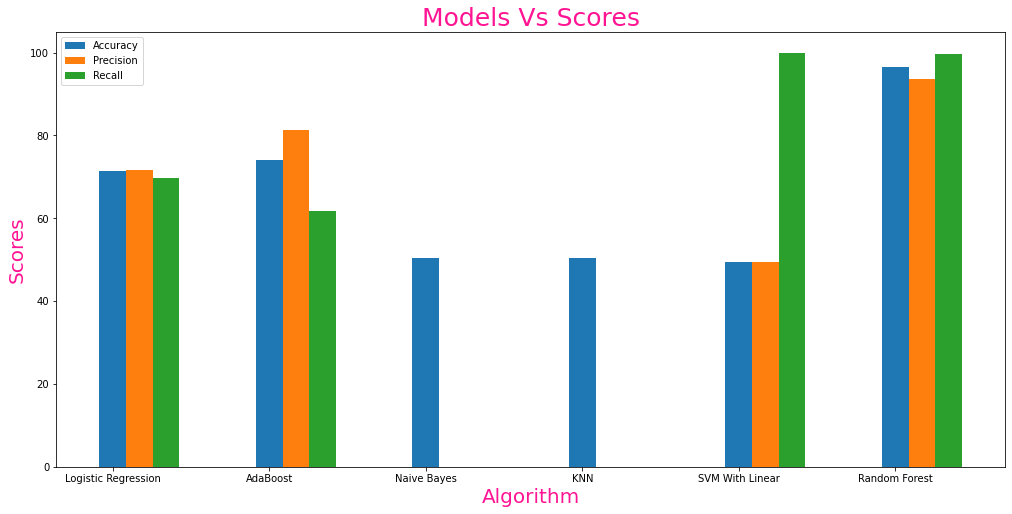

In [108]:
plt.figure(figsize = (17,8))
w=0.17
bar1 = np.arange(len(a))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]


plt.bar(bar1,b,w,label='Accuracy')
plt.bar(bar2,c,w,label='Precision')
plt.bar(bar3,d,w,label ='Recall')

plt.xlabel('Algorithm',size=20,color='deeppink')
plt.ylabel('Scores',size=20,color='deeppink')

plt.title('Models Vs Scores',size = 25 , color = "deeppink")
plt.xticks(bar1,a)
plt.legend()
plt.show()

# Conclusion :

# Random Forest  Model performs better in predicting if the client will subscribe to term deposit or not